In [418]:
import os #Para directorio de trabajo
import numpy as np #Métodos numéricos y arrays
import pandas as pd #Manipulación de DF

import matplotlib.pyplot as plt # libreria para realizar graficas
import seaborn as sns; sns.set() 

# Kmeans model
from sklearn.cluster import KMeans # libreria Kmeans para realizar clustering

In [419]:
# Establezcamos directorio de trabajo

os.chdir(os.getcwd())

os.getcwd() #Muestreme el directorio de trabajo
os.listdir() #Archivos en el ditrectorio de trabajo

['actividad2.ipynb', 'Data set']

In [420]:
# Importar base de datos

forbes22 = pd.read_csv('Data set/Forbes 2000 2022.csv',encoding= 'latin-1',sep=';')

forbes22

,ï»¿Rank,Company Name,Country,Sales\n($millions),Profits\n($millions),Assets\n($millions),Market Value \nAs of 05/12/22 ($m),Unnamed: 7
0,1,Berkshire Hathaway,United States,"$276,090","$89,800","$958,780","$741,480",NaN
1,2,ICBC,China,"$208,130","$54,030","$5,518,510","$214,430",NaN
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,"$400,380","$105,360","$576,040","$2,292,080",NaN
3,4,JPMorgan Chase,United States,"$124,540","$42,120","$3,954,690","$374,450",NaN
4,5,China Construction Bank,China,"$202,070","$46,890","$4,746,950","$181,320",NaN
...,...,...,...,...,...,...,...,...
1995,1996,Shenzhen Feima International Supply Chain,China,$37,"$1,410",$166,"$1,140",NaN
1996,1997,NMDC,India,"$3,520","$1,410","$5,710","$6,400",NaN
1997,1998,Sichuan Changhong Electric,China,"$15,720",$53,"$12,110","$1,960",NaN
1998,1999,Satellite Chemical,China,"$4,410",$931,"$7,640","$9,520",NaN


In [421]:
### Data cleaning 

# Qué variables tengo

forbes22.columns

Index(['ï»¿Rank', 'Company Name', 'Country', 'Sales\n($millions)',
       'Profits\n($millions)', 'Assets\n($millions)',
       'Market Value \nAs of 05/12/22 ($m)', 'Unnamed: 7'],
      dtype='object')

In [422]:
#Cambiar nombre de variables
forbes22.columns = ['Rank','Company','Country','Sales','Profits','Assets','Market_value','Unnamed']
forbes22.columns

Index(['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market_value', 'Unnamed'],
      dtype='object')

In [423]:
# se elimina ultima columna ya que no cuenta con información
forbes22 = forbes22.drop('Unnamed',axis=1)
forbes22.head(n=10) # Top 10 de las empresas de Forbes 22

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,1,Berkshire Hathaway,United States,"$276,090","$89,800","$958,780","$741,480"
1,2,ICBC,China,"$208,130","$54,030","$5,518,510","$214,430"
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,"$400,380","$105,360","$576,040","$2,292,080"
3,4,JPMorgan Chase,United States,"$124,540","$42,120","$3,954,690","$374,450"
4,5,China Construction Bank,China,"$202,070","$46,890","$4,746,950","$181,320"
5,6,Amazon,United States,"$469,820","$33,360","$420,550","$1,468,400"
6,7,Apple,United States,"$378,700","$100,560","$381,190","$2,640,320"
7,8,Agricultural Bank of China,China,"$181,420","$37,380","$4,561,050","$133,380"
8,9,Bank of America,United States,"$96,830","$31,000","$3,238,220","$303,100"
9,10,Toyota Motor,Japan,"$281,750","$28,150","$552,460","$237,730"


In [424]:
# ver información de la base de datos
forbes22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          2000 non-null   int64 
 1   Company       2000 non-null   object
 2   Country       2000 non-null   object
 3   Sales         2000 non-null   object
 4   Profits       2000 non-null   object
 5   Assets        2000 non-null   object
 6   Market_value  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [425]:
# Indica si hay valores con NA 
forbes22.isna().any()

Rank            False
Company         False
Country         False
Sales           False
Profits         False
Assets          False
Market_value    False
dtype: bool

In [426]:
# Modifiquemos el formato de los datos (Coerción de datos)

forbes22 = forbes22.replace(',','',regex= True) # regex: expresión regular
forbes22.head()

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,1,Berkshire Hathaway,United States,$276090,$89800,$958780,$741480
1,2,ICBC,China,$208130,$54030,$5518510,$214430
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$400380,$105360,$576040,$2292080
3,4,JPMorgan Chase,United States,$124540,$42120,$3954690,$374450
4,5,China Construction Bank,China,$202070,$46890,$4746950,$181320


In [427]:
# Se reemplaza valores de simbolo especial en este caso $
forbes22 = forbes22.replace('\$','',regex=True) #La expresión regular de $ es con \$
forbes22.head()

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,1,Berkshire Hathaway,United States,276090,89800,958780,741480
1,2,ICBC,China,208130,54030,5518510,214430
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400380,105360,576040,2292080
3,4,JPMorgan Chase,United States,124540,42120,3954690,374450
4,5,China Construction Bank,China,202070,46890,4746950,181320


In [428]:
#Tenemos un caracter extraño que no puede ser coercionado a float: '-'

forbes22.isin(['-']) # Método de Pandas

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False


In [429]:
forbes22.isin(['-']).any()

Rank            False
Company         False
Country         False
Sales           False
Profits         False
Assets          False
Market_value    False
dtype: bool

In [430]:
# reemplaza caracter - en la columna de Assets
forbes22['Assets'] = forbes22['Assets'].replace('-',float('nan')) 

In [431]:
# Valida si existe otro caracter - en el dataset
forbes22.isin(['-']).any()

Rank            False
Company         False
Country         False
Sales           False
Profits         False
Assets          False
Market_value    False
dtype: bool

In [432]:
# Coercionar los datos de str a float
forbes22.iloc[:,3:] = forbes22.iloc[:,3:].astype(float) 

Inicio utilización Clusterización Kmeans

Se obtienen los datos de las columnas de Ventas(Sales) y Ganancias(Profits) del dataset Forbes 2022 el cual ya cuenta con la limpieza de los datos, con las cuales se realizarán analisis de versus de las ventas y ganancias de cada una de las empresas, mediante las graficas y procesos de entrenamiento se visualizarán los datos de ocupan cada cluster definido

In [433]:
# Selccionamos valores a analizar (Ventas(Sales) y ganancias(Profits))
forbes22_data = forbes22[['Sales','Profits']]
forbes22_data

,Sales,Profits
0,276090.0,89800.0
1,208130.0,54030.0
2,400380.0,105360.0
3,124540.0,42120.0
4,202070.0,46890.0
...,...,...
1995,37.0,1410.0
1996,3520.0,1410.0
1997,15720.0,53.0
1998,4410.0,931.0


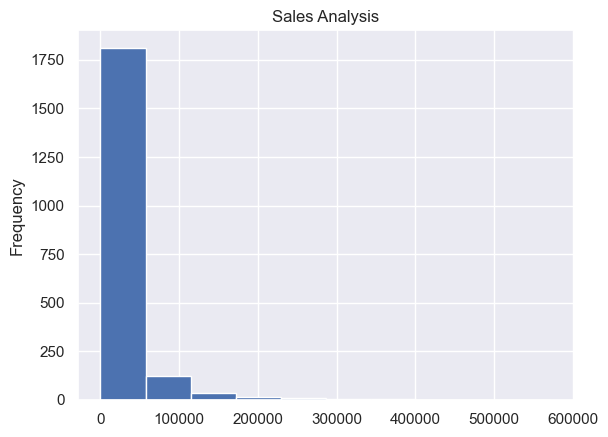

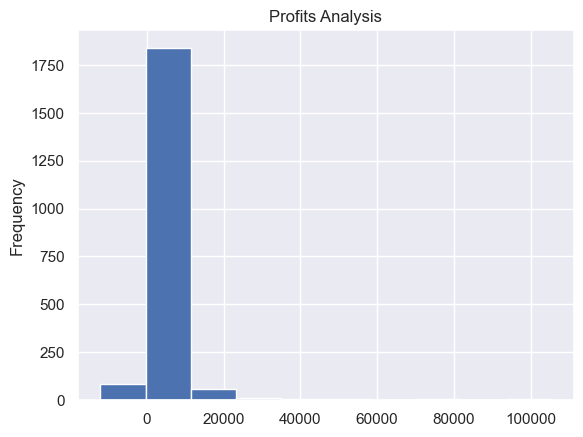

In [434]:
# Análisis de ventas

x = forbes22_data['Sales'].plot(kind='hist')
plt.title('Sales Analysis')
plt.show()

# Análisis de ganacias

y = forbes22_data['Profits'].plot(kind='hist')
plt.title('Profits Analysis')
plt.show()

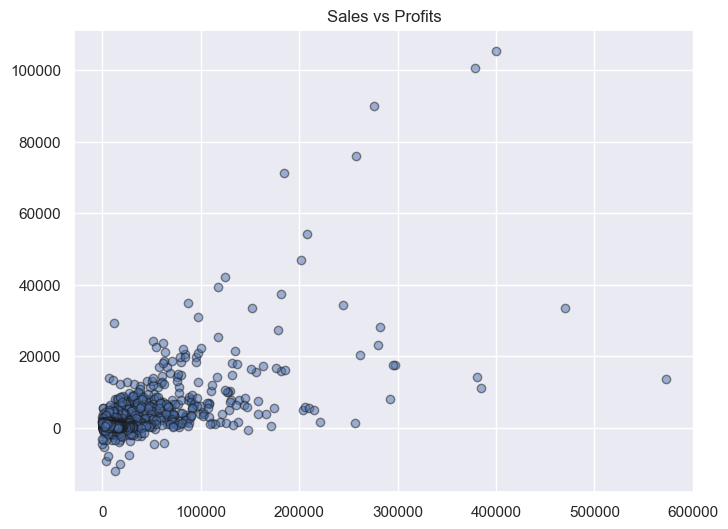

In [435]:
# Gráfica ventas contra ganancias

plt.figure(figsize=(8, 6))
plt.title('Sales vs Profits')
plt.scatter(x= forbes22_data['Sales'], y =  forbes22_data['Profits'], alpha=0.5, c='b', edgecolors='k')
plt.show()

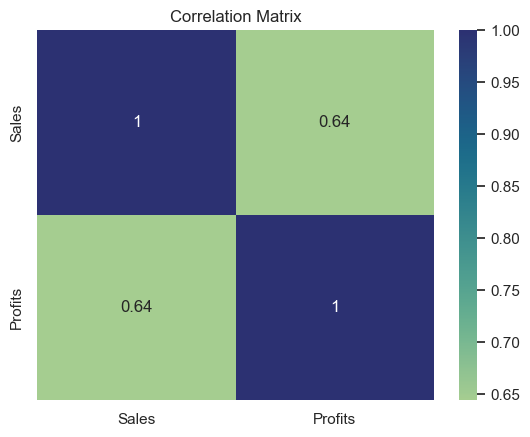

In [436]:
# Gráfica para validación de correlación de datos
# Heatmap of correlation matrix

sns.heatmap(forbes22_data.iloc[:, 0:].corr(), annot = True, cmap = "crest")
plt.title('Correlation Matrix')
plt.show()

In [437]:
# Creación metodo de entrenamiento de datos de acuerdo a dataset forbes22 con ventas y ganancias
#  How many clusters (k) are required?
# Elbow method

WCSS = [] #"Within-Cluster-Sum-of-Squares"

for i in range(1,11):
    kmeans = KMeans(n_clusters= i,init='k-means++',random_state=0) #pruebas k
    kmeans.fit(forbes22_data) #entrenamiento
    WCSS.append(kmeans.inertia_) #guardamos resultados

c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Administrador\AppData\Local\Programs\Python\Python31

In [438]:
print(WCSS)

[3426963513060.7974, 1362818575382.954, 682610665483.4873, 432445968518.8853, 308120257521.4406, 220470259573.24265, 175590778511.2197, 144835962129.7273, 118867343970.41745, 98647589368.93079]


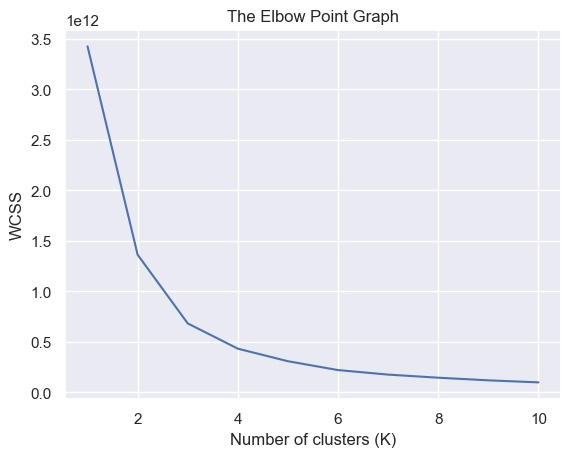

In [439]:
# Se crea grafíca del codo, para analizar cual es el punto de suavidad, segun analisis es el 6

plt.plot(range(1,11),WCSS)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [440]:
# Se establece el modleo Kmeans con 5 cluster
kmeans_model = KMeans(n_clusters=5, init='k-means++',random_state=0)

In [441]:
# Prediction

y = kmeans_model.fit_predict(forbes22_data)

c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [442]:
len(y)
print(y)

[3 3 2 ... 0 0 0]


In [443]:
forbes22_data.columns

Index(['Sales', 'Profits'], dtype='object')

C:\Users\Administrador\AppData\Local\Temp\ipykernel_21136\158060662.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Sales', y='Profits', data=forbes22_data, palette = "viridis")


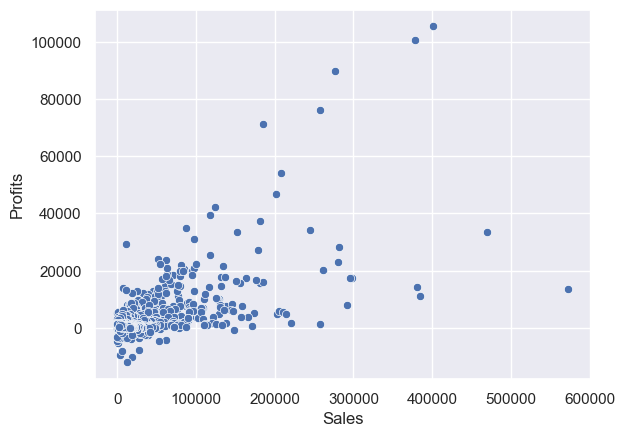

In [444]:
#View data points before clustering them

sns.scatterplot(x='Sales', y='Profits', data=forbes22_data, palette = "viridis")
plt.show()

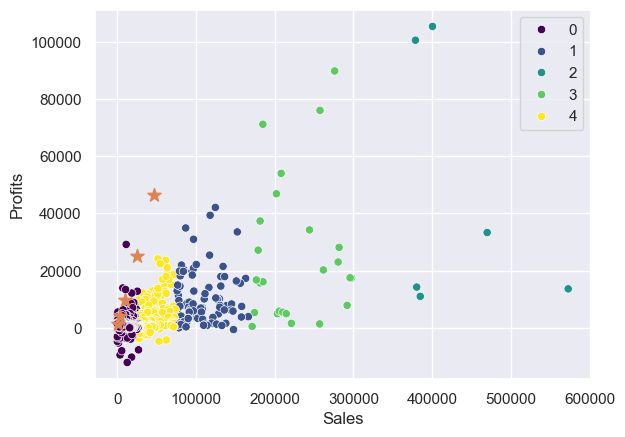

In [445]:
# Se analiza la data de ventas y ganancias, para identificación de valores en cluster
# Kmeans
sns.scatterplot(x='Sales', y='Profits', hue= y, data=forbes22_data, palette = "viridis")
plt.scatter(kmeans_model.cluster_centers_[:,1],kmeans_model.cluster_centers_[:,1],marker='*',s=100)
plt.show()

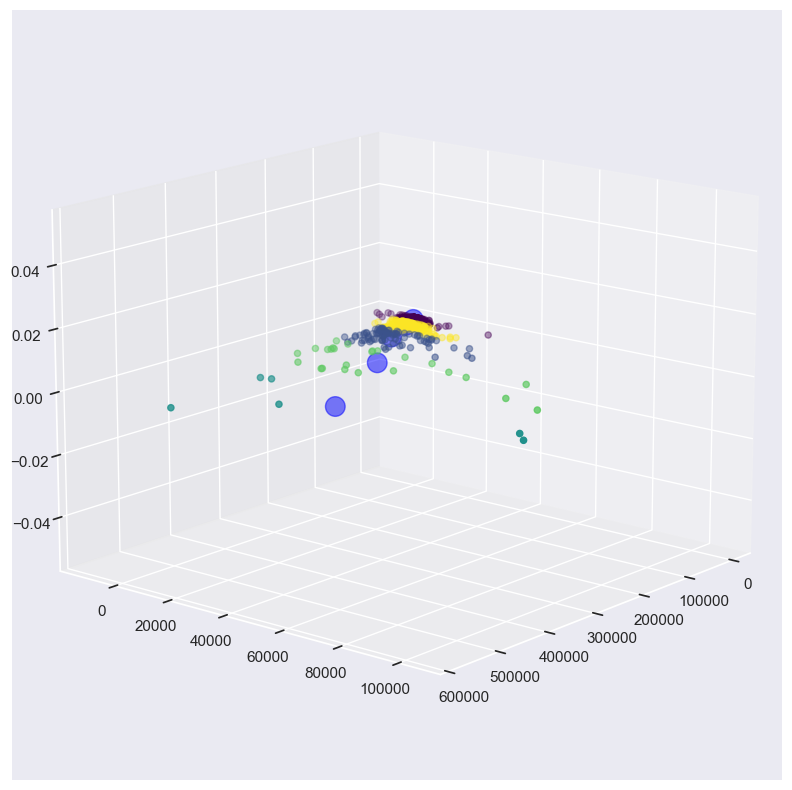

In [446]:
# Se analiza la información mediante una grafica 3d

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


ax.view_init(15, 40)

ax.scatter(forbes22_data['Sales'], forbes22_data['Profits'],c= y,cmap='viridis')
ax.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],c ='blue',s=200,alpha = 0.5)

plt.show()